In [1]:
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import numpy as np
import math

In [2]:
datos, metadatos = tfds.load('fashion_mnist', as_supervised=True, with_info=True)
datos_entrenamiento, datos_pruebas = datos['train'], datos['test']
nombres_clases = metadatos.features['label'].names

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/fashion_mnist/incomplete.KYPMX9_3.0.1/fashion_mnist-train.tfrecord*...:   …

Generating test examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/fashion_mnist/incomplete.KYPMX9_3.0.1/fashion_mnist-test.tfrecord*...:   0…

Dataset fashion_mnist downloaded and prepared to /root/tensorflow_datasets/fashion_mnist/3.0.1. Subsequent calls will reuse this data.


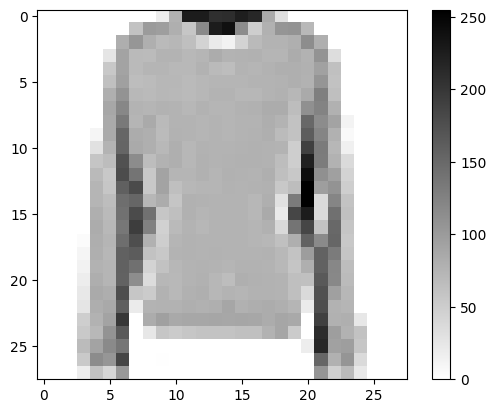

In [3]:
for imagen, etiqueta in datos_entrenamiento.take(1):
    break
imagen = imagen.numpy().reshape((28,28))

plt.figure()
plt.imshow(imagen, cmap=plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.show(block=True)

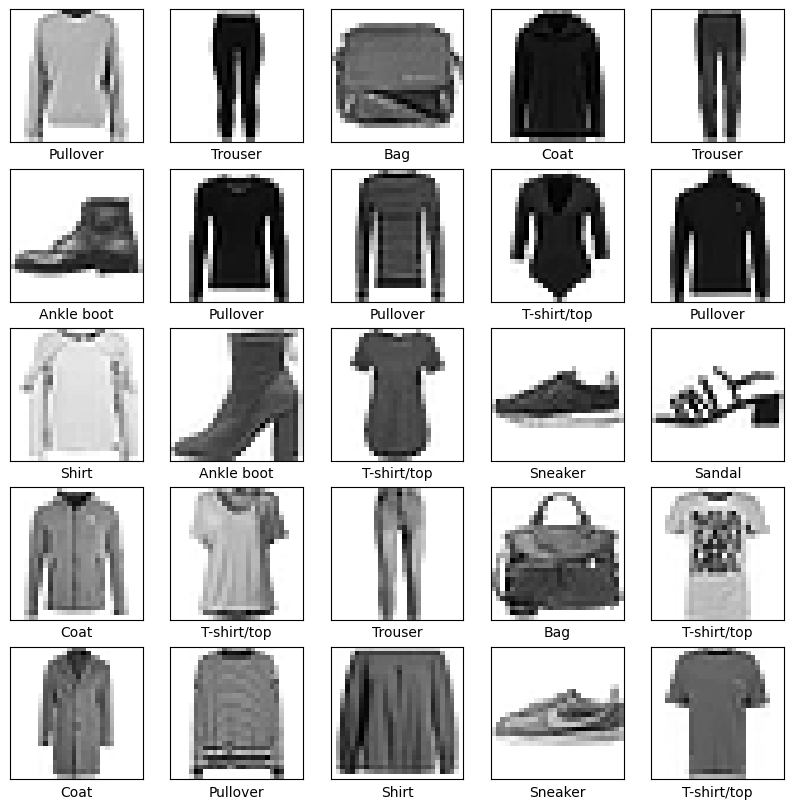

In [4]:
# Mostrar 25 imágenes
plt.figure(figsize=(10,10))
for i, (imagen, etiqueta) in enumerate(datos_entrenamiento.take(25)):
    imagen = imagen.numpy().reshape((28,28))
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(imagen, cmap=plt.cm.binary)
    plt.xlabel(nombres_clases[etiqueta])
plt.show(block=True)


In [5]:
# Normalizar
def normalizar(imagenes, etiquetas):
    imagenes = tf.cast(imagenes, tf.float32)
    imagenes /= 255.0
    return imagenes, etiquetas


In [6]:
datos_entrenamiento = datos_entrenamiento.map(normalizar)
datos_pruebas = datos_pruebas.map(normalizar)

In [7]:
modelo = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(28,28,1)),
    tf.keras.layers.MaxPool2D(2,2),

    tf.keras.layers.Conv2D(64, (3,3), padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(2,2),

    tf.keras.layers.Conv2D(64, (3,3), padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(2,2),

    tf.keras.layers.Conv2D(128, (3,3), padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(2,2),

    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
modelo.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy']
)

In [9]:
num_ej_entrenamiento = metadatos.splits["train"].num_examples
num_ej_pruebas = metadatos.splits["test"].num_examples
print("Ejemplos entrenamiento:", num_ej_entrenamiento)
print("Ejemplos prueba:", num_ej_pruebas)

Ejemplos entrenamiento: 60000
Ejemplos prueba: 10000


In [10]:
TAMANO_LOTE = 32
datos_entrenamiento = datos_entrenamiento.repeat().shuffle(num_ej_entrenamiento).batch(TAMANO_LOTE)
datos_pruebas = datos_pruebas.batch(TAMANO_LOTE)

In [11]:
historial = modelo.fit(
    datos_entrenamiento, epochs=30,
    steps_per_epoch=math.ceil(num_ej_entrenamiento/TAMANO_LOTE),
    validation_data=datos_pruebas,
    validation_steps=math.ceil(num_ej_pruebas/TAMANO_LOTE)
    )

Epoch 1/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 6ms/step - accuracy: 0.7243 - loss: 0.7419 - val_accuracy: 0.8683 - val_loss: 0.3672
Epoch 2/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8742 - loss: 0.3452 - val_accuracy: 0.8928 - val_loss: 0.2945
Epoch 3/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8962 - loss: 0.2847 - val_accuracy: 0.8975 - val_loss: 0.2775
Epoch 4/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9099 - loss: 0.2446 - val_accuracy: 0.9066 - val_loss: 0.2584
Epoch 5/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9179 - loss: 0.2239 - val_accuracy: 0.9116 - val_loss: 0.2531
Epoch 6/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9262 - loss: 0.2011 - val_accuracy: 0.9121 - val_loss: 0.2470
Epoch 7/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9317 - loss: 0.1887 - val_accuracy: 0.9123 - val_loss: 0.2467
Epoch 8/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9359 - loss: 0.1742 

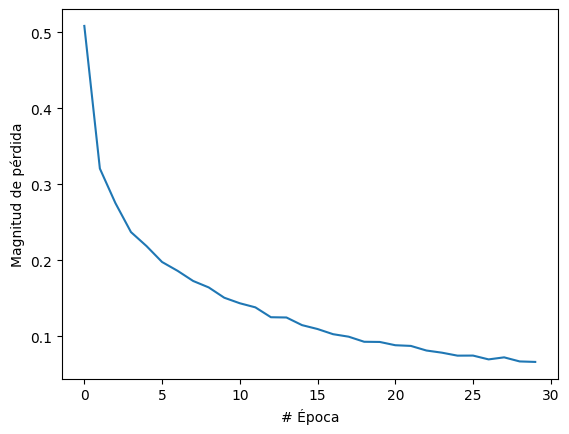

In [12]:
# Gráfica de pérdida
plt.figure()
plt.plot(historial.history["loss"])
plt.xlabel("# Época")
plt.ylabel("Magnitud de pérdida")
plt.show(block=True)



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 330ms/step


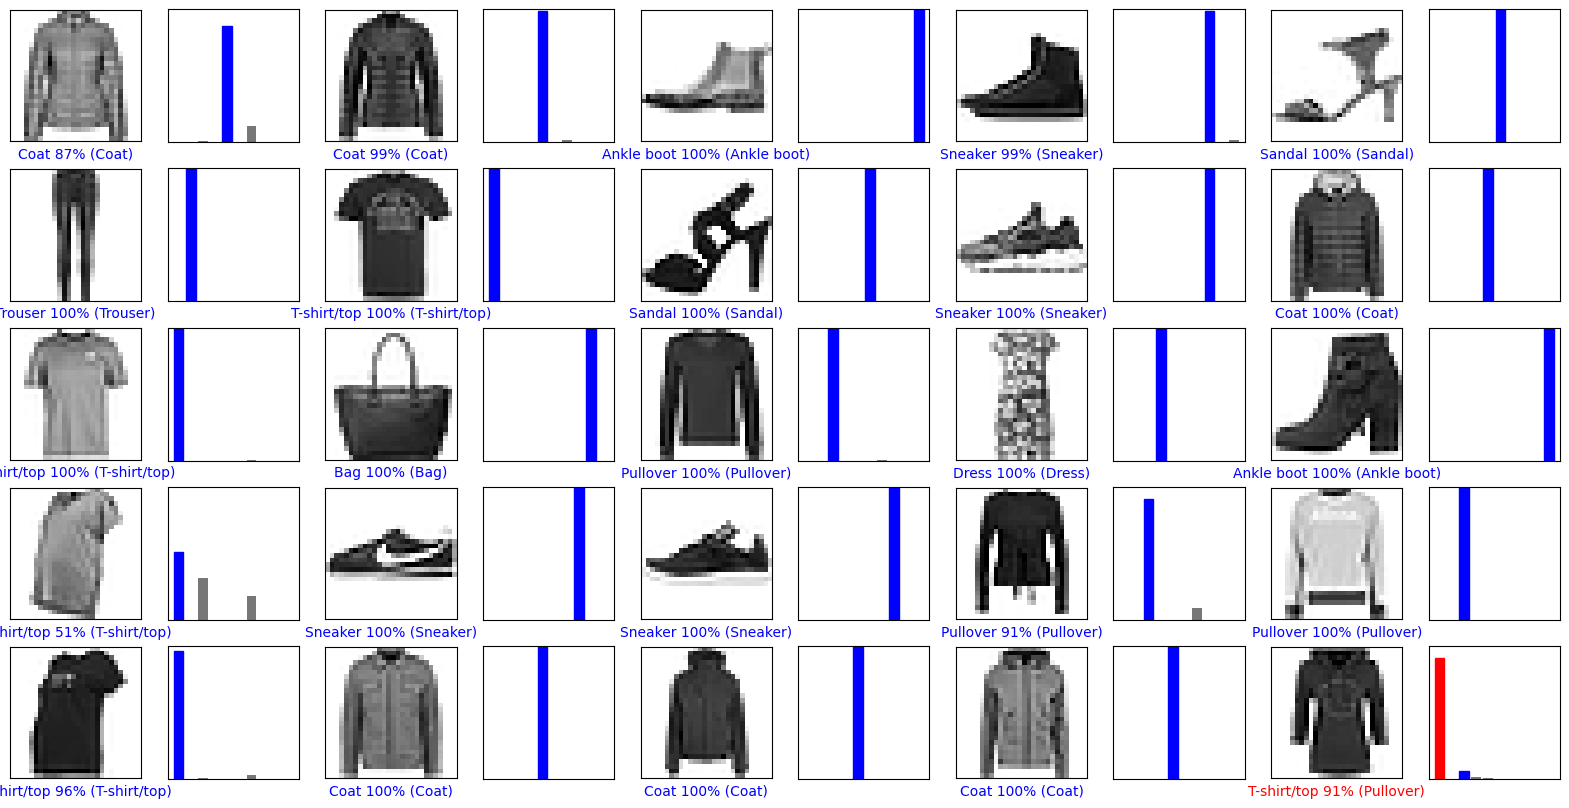

In [13]:
# =======================
# Predicciones
# =======================
for imagenes_prueba, etiquetas_prueba in datos_pruebas.take(1):
    imagenes_prueba = imagenes_prueba.numpy()
    etiquetas_prueba = etiquetas_prueba.numpy()
    predicciones = modelo.predict(imagenes_prueba)

def graficar_imagen(i, arr_predicciones, etiquetas_reales, imagenes):
    arr_predicciones, etiqueta_real, img = arr_predicciones[i], etiquetas_reales[i], imagenes[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img[...,0], cmap=plt.cm.binary)

    etiqueta_prediccion = np.argmax(arr_predicciones)
    color = 'blue' if etiqueta_prediccion == etiqueta_real else 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(
        nombres_clases[etiqueta_prediccion],
        100*np.max(arr_predicciones),
        nombres_clases[etiqueta_real]), color=color)

def graficar_valor_arreglo(i, arr_predicciones, etiqueta_real):
    arr_predicciones, etiqueta_real = arr_predicciones[i], etiqueta_real[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    grafica = plt.bar(range(10), arr_predicciones, color="#777777")
    plt.ylim([0,1])
    etiqueta_prediccion = np.argmax(arr_predicciones)
    grafica[etiqueta_prediccion].set_color('red')
    grafica[etiqueta_real].set_color('blue')

# Mostrar cuadrícula de predicciones
filas, columnas = 5,5
num_imagenes = filas*columnas
plt.figure(figsize=(2*2*columnas, 2*filas))
for i in range(num_imagenes):
    plt.subplot(filas, 2*columnas, 2*i+1)
    graficar_imagen(i, predicciones, etiquetas_prueba, imagenes_prueba)
    plt.subplot(filas, 2*columnas, 2*i+2)
    graficar_valor_arreglo(i, predicciones, etiquetas_prueba)
plt.show(block=True)


In [14]:
# =======================
# Predicción de imagen suelta
# =======================
imagen = imagenes_prueba[15]  # Elegimos la imagen 15
imagen_array = np.array([imagen])
prediccion = modelo.predict(imagen_array)
etiqueta_real = etiquetas_prueba[15]
etiqueta_pred = np.argmax(prediccion[0])

print("Predicción imagen 15:", nombres_clases[etiqueta_pred])
print("Etiqueta real:", nombres_clases[etiqueta_real])


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 588ms/step
Predicción imagen 15: T-shirt/top
Etiqueta real: T-shirt/top


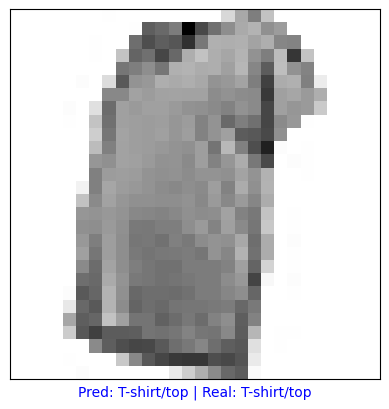

In [15]:
# =======================
# Gráfico para verificar predicción
# =======================
plt.figure()
plt.imshow(imagen[...,0], cmap=plt.cm.binary)
plt.grid(False)
plt.xticks([])
plt.yticks([])

# Color según acierto: azul si es correcto, rojo si es incorrecto
color = 'blue' if etiqueta_pred == etiqueta_real else 'red'
plt.xlabel(f"Pred: {nombres_clases[etiqueta_pred]} | Real: {nombres_clases[etiqueta_real]}", color=color)
plt.show(block=True)

